In [1]:
import numpy as np
import pandas as pd
import json
import urllib.request
import time
import requests 
import datetime as dt

In [2]:
bike_df = pd.read_csv("bike_csv_final.csv", index_col = 0)
bike_df.head()

/Users/diana/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,9,20,21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date_stolen,date_stolen_string,debug,description,frame_colors,frame_model,id,is_stock_img,large_img,location_found,...,serial,source_name,source_unique_id,status,stolen,stolen_location,thumb,title,url,year
0,1.568279e+09,2019-09-12,NaN,NaN,['Black'],Disc Trucker,655938,False,https://files.bikeindex.org/uploads/Pu/184335/...,NaN,...,Unknown,NaN,NaN,NaN,True,Rotterdam,https://files.bikeindex.org/uploads/Pu/184335/...,2019 Surly Disc Trucker,NaN,2019.0
1,1.568277e+09,2019-09-12,NaN,Alpha Black Aluminum w/TCT Carbon stays,['Red'],Pilot 2.1,655936,True,https://bikebook.s3.amazonaws.com/uploads/Fr/1...,NaN,...,Unknown,NaN,NaN,NaN,True,NaN,https://bikebook.s3.amazonaws.com/uploads/Fr/1...,2008 Trek Pilot 2.1,NaN,2008.0
2,1.568260e+09,2019-09-11,NaN,Alpha Silver Aluminum,['Blue'],7.1 FX,603985,True,https://bikebook.s3.amazonaws.com/uploads/Fr/4...,NaN,...,083C38551,NaN,NaN,NaN,True,NaN,https://bikebook.s3.amazonaws.com/uploads/Fr/4...,2012 Trek 7.1 FX,NaN,2012.0
3,1.568255e+09,2019-09-11,NaN,NaN,['Blue'],Marlin 5,655896,False,https://files.bikeindex.org/uploads/Pu/184311/...,NaN,...,WTU262C2004N,NaN,NaN,NaN,True,"Arcata,CA,95521",https://files.bikeindex.org/uploads/Pu/184311/...,2019 Trek Marlin 5,NaN,2019.0
4,1.568254e+09,2019-09-11,NaN,NaN,['Yellow or Gold'],NaN,655894,False,https://files.bikeindex.org/uploads/Pu/184307/...,NaN,...,Unknown,NaN,NaN,NaN,True,"New Orleans,LA,70116",https://files.bikeindex.org/uploads/Pu/184307/...,Schwinn,NaN,NaN


In [3]:
bike_df["stolen"].value_counts()

False    206889
True      69811
Name: stolen, dtype: int64

In [5]:
bike_df.shape

(276700, 24)

In [ ]:
list_of_ids = bike_df["id"].to_list()
url_list = []
for id_bike in list_of_ids:
    url = f'https://bikeindex.org:443/api/v3/bikes/{id_bike}'
    url_list.append(url)

In [ ]:
list_of_individual_bikes = []
counter = 0
for id_bike in list_of_ids:
    counter+=1
    if counter%100 == 0:
        print(counter)
    url = f'https://bikeindex.org:443/api/v3/bikes/{id_bike}'
    result = requests.get(url)
    result_json = result.json()
    k = result_json["bike"]
    list_of_individual_bikes.append(k)
        

            
list_of_individual_bikes_df = pd.DataFrame.from_dict(list_of_individual_bikes)
    
with open('bike_csv_individual.csv', 'a') as f:
    list_of_individual_bikes_df.to_csv(f, header=True,encoding='utf8')
        


In [ ]:
result_json["bike"]["stolen_record"]["latitude"]

In [ ]:
new_df = pd.read_csv("bike_csv_individual.csv", index_col = 0)
new_df.head()

In [ ]:
new_df.columns

In [ ]:
import ast

In [ ]:
l = ast.literal_eval(new_df["stolen_record"][0])

In [6]:
import pandas as pd

In [7]:
bike_df_1 = pd.read_csv("bike_csv_first_25000.csv", index_col = 0)

/Users/diana/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (2,9,20,21,25,26,27,28,31,34,35,36,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
bike_df_2 = pd.read_csv("bike_csv_first_25001.csv", index_col = 0)

In [9]:
bike_df_3 = pd.read_csv("bike_csv_first_70001.csv", index_col = 0)

In [10]:
bike_df_4 = pd.read_csv("bike_csv_first_130001.csv", index_col = 0)

In [11]:
bike_df_5 = pd.read_csv("bike_csv_first_190001.csv", index_col = 0)

In [12]:
bike_df_1 = bike_df_1[:25000]


In [13]:
bike_df_2 = bike_df_2[25001:70000]

In [14]:
bike_df_3 = bike_df_3[70000:130000]

In [15]:
bike_df_4 = bike_df_4[130000:190000]

In [16]:
bike_df_5 = bike_df_5[190000:210000]
bike_df_5.tail()

,date_stolen,date_stolen_string,debug,description,frame_colors,frame_model,id,is_stock_img,large_img,location_found,...,rear_tire_narrow,front_tire_narrow,rear_wheel_size_iso_bsd,front_wheel_size_iso_bsd,handlebar_type_slug,front_gear_type_slug,rear_gear_type_slug,locking_description,paint_description,lock_defeat_description
209995,NaN,NaN,NaN,NaN,['Red'],NaN,403132,False,NaN,NaN,...,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209996,NaN,NaN,NaN,Classic City bike/ Commuter bike.,['Black'],Pure Cycle Classic B1,403131,False,NaN,NaN,...,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209997,NaN,NaN,NaN,NaN,"['Silver, gray or bare metal', 'Yellow or Gold']",NaN,403130,False,NaN,NaN,...,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209998,NaN,NaN,NaN,NaN,['Green'],Cinder Cone,403128,False,NaN,NaN,...,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209999,NaN,NaN,NaN,NaN,"['Silver, gray or bare metal']",Timberline,403119,False,NaN,NaN,...,True,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
new_combined = bike_df_1.append(bike_df_2)

In [18]:
new_combined = new_combined.append(bike_df_3)

In [19]:
new_combined = new_combined.append(bike_df_4)

In [20]:
bike_df = new_combined.append(bike_df_5)

In [21]:
# with open('bike_csv_final_22.csv', 'a') as f:
#     biked_df.to_csv(f, header=True,encoding='utf8')

In [22]:
any(bike_df['id'].duplicated())

False

In [23]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
import numpy as np

In [24]:
bike_df["stolen"].value_counts()

False    140189
True      69810
Name: stolen, dtype: int64

In [25]:
import numpy as np

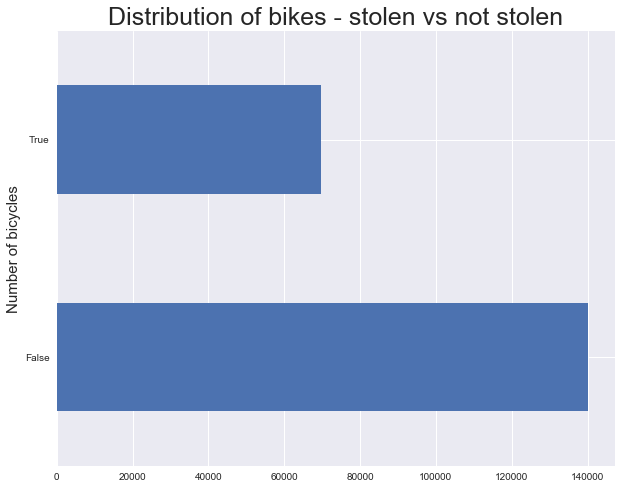

In [26]:
plt.figure(figsize = (10, 8))
plt.style.use("seaborn")
plt.title("Distribution of bikes - stolen vs not stolen", size = '25')
bike_df["stolen"].value_counts().plot.barh()
plt.ylabel('Number of bicycles', size = '15')
plt.savefig("distribution of bike", bbox_inches='tight')





In [27]:
bike_df["date"] = pd.to_datetime(bike_df["date_stolen_string"], unit = 'ns')
bike_df["stolen_year"] = bike_df["date"].dt.year
bike_df["stolen_month"] = bike_df["date"].dt.month

In [28]:
newDF = pd.DataFrame()

In [29]:
list_of_years = [2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [30]:
newDF["years"] = list_of_years

In [31]:
stolen_per_year = [45, 490, 686, 868, 1552, 2169, 2807, 3350, 4170, 5105, 5144, 8096, 9893, 9533, 8985, 6735]

In [32]:
newDF["number_stolen"] = stolen_per_year

In [33]:
with open('bike_stolen_per_year.csv', 'a') as f:
    
    newDF.to_csv(f, header=True,encoding='utf8')

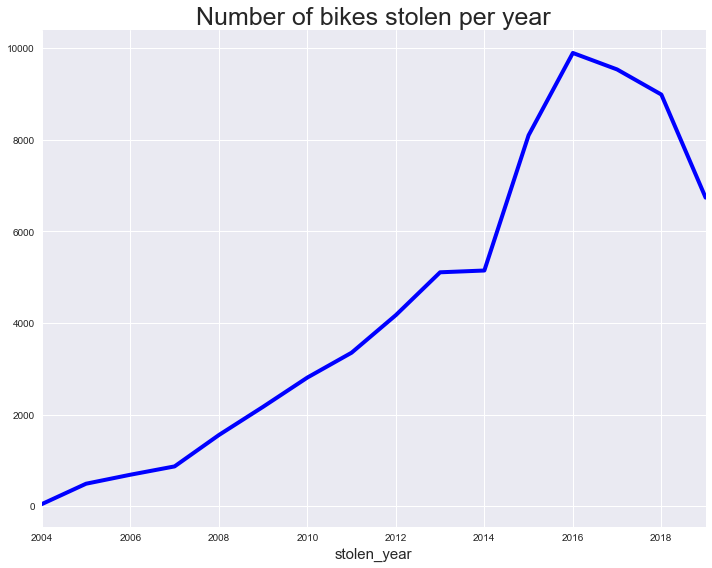

In [38]:
plt.figure(figsize = (10, 8))
plt.style.use("seaborn")
plt.xlabel('Year', size = '15')
plt.title("Number of bikes stolen per year", size = '25') 
bike_df[bike_df["stolen_year"] > 2003].groupby("stolen_year")["stolen"].count().plot(color='blue', linewidth=4)
plt.tight_layout()
plt.savefig("number of bikes stolen per year", bbox_inches='tight')



In [39]:
frame_color_counts = bike_df["frame_colors"].value_counts()

In [40]:
bike_df['frame_colors'] = np.where(bike_df['frame_colors'].isin(frame_color_counts.index[frame_color_counts <= 500]), 'Other', bike_df['frame_colors'])

In [41]:
bike_df["frame_colors"].value_counts()

['Black']                                  62907
['Silver, gray or bare metal']             26642
['Blue']                                   26448
Other                                      15489
['White']                                  14796
['Red']                                    14183
['Green']                                  12708
['Orange']                                  4879
['Purple']                                  4079
['Yellow or Gold']                          3861
['Teal']                                    3122
['Brown']                                   2682
['Black', 'Red']                            2431
['Pink']                                    1837
['Black', 'Blue']                           1566
['Black', 'Green']                          1473
['Black', 'White']                          1454
['Blue', 'White']                           1147
['Black', 'Silver, gray or bare metal']      972
['Red', 'Black']                             856
['Black', 'Yellow or

In [42]:
import re

In [43]:
list_of_parsed_states = []
for i in bike_df["stolen_location"]:

    state = re.findall(',(\w+),', str(i)) or 'unknown'
    list_of_parsed_states.append(state)
    

In [44]:
bike_df["stolen_state"] = list_of_parsed_states

In [45]:
bike_df["stolen_state"].value_counts

<bound method IndexOpsMixin.value_counts of 0         unknown
1         unknown
2         unknown
3            [CA]
4            [LA]
5            [MA]
6         unknown
7            [CA]
8         unknown
9         unknown
10           [MA]
11           [WI]
12        unknown
13           [OR]
14           [CO]
15           [RI]
16        unknown
17           [WI]
18        unknown
19        unknown
20           [WA]
21        unknown
22        unknown
23        unknown
24        unknown
25        unknown
26           [ID]
27           [LA]
28           [FL]
29        unknown
           ...   
209970    unknown
209971    unknown
209972    unknown
209973    unknown
209974    unknown
209975    unknown
209976    unknown
209977    unknown
209978    unknown
209979    unknown
209980    unknown
209981    unknown
209982    unknown
209983    unknown
209984    unknown
209985    unknown
209986    unknown
209987    unknown
209988    unknown
209989    unknown
209990    unknown
209991    unknown
20

In [70]:
all_words = (bike_df["theft_description"].dropna().to_list())

In [71]:
str1 = ''.join(all_words)

In [94]:
import matplotlib.pyplot as plt

In [95]:
from wordcloud import WordCloud, STOPWORDS

In [96]:
import numpy as np

In [97]:
from PIL import Image

In [98]:
words_all = str1.lower()

In [99]:
wordcloud = WordCloud(collocations = False).generate(words_all)

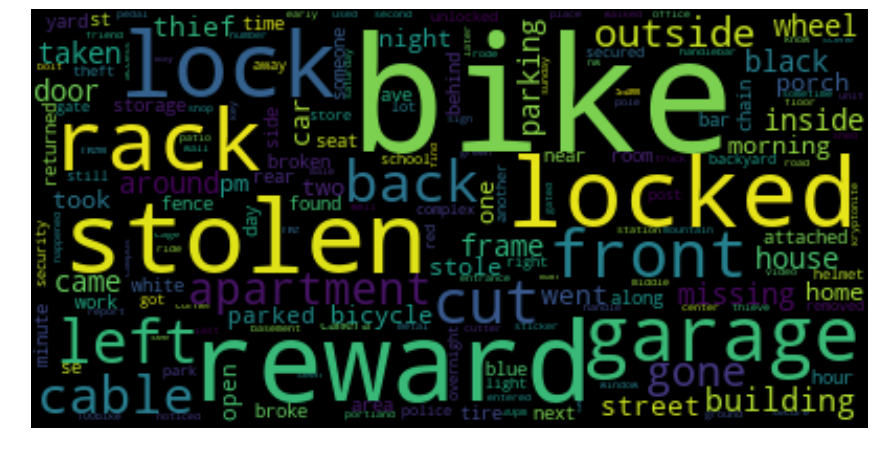

<Figure size 576x396 with 0 Axes>

In [100]:
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()
plt.savefig("Word_cloud.png")